In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/Julia-Susser/l/master/input/h%20(1).csv", index_col=0)


hf = pd.read_csv("https://raw.githubusercontent.com/Julia-Susser/Research-Work/master/output/Codes/1digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
cf = pd.read_csv("https://raw.githubusercontent.com/Julia-Susser/Research-Work/master/output/Codes/2digit_occupations.csv", index_col=0)
cf = cf.set_index("codes")


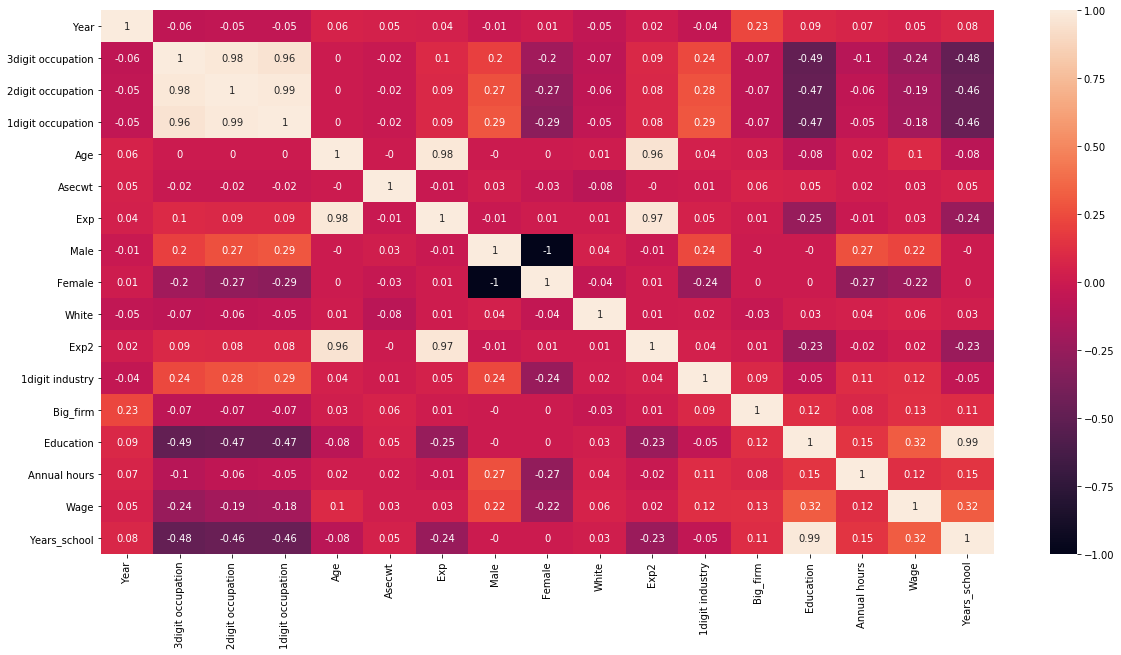

In [5]:
import seaborn as sns
plt.figure(figsize = (20,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

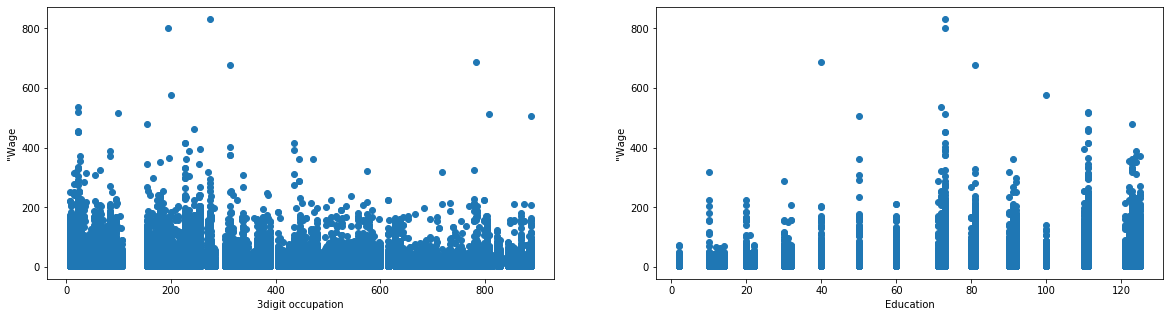

In [6]:
plt.figure(figsize=(20, 5))

features = ['3digit occupation', "Education"]
target = df['Wage']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("")
    plt.xlabel(col)
    plt.ylabel('"Wage')

In [7]:
df = df[(df["Wage"]<20)&(df["Annual hours"]<3000)]
df["Wage"].max()

19.0

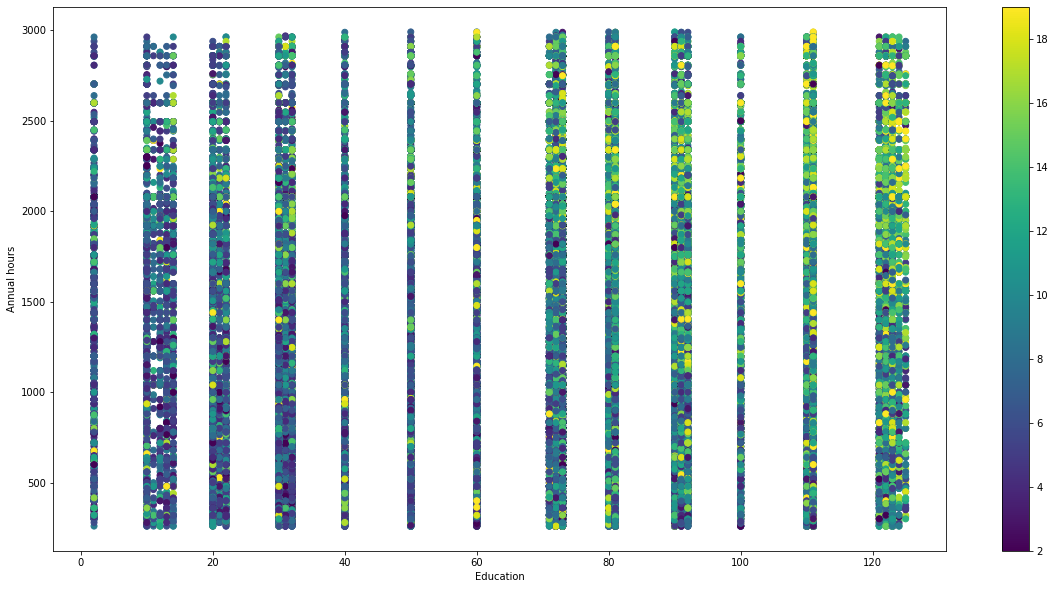

In [8]:

def color_plotter(x, y, c):
  plt.figure(figsize=(20, 10))
  plt.scatter(x=df[x], y=df[y], c=df[c])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.colorbar()


  
plt.show()

# Example 1: Industrial zoning % vs pollution levels with color representing home price
color_plotter("Education","Annual hours","Wage")

In [9]:

X_unscaled = df.drop("Education",axis=1)
#X_unscaled = df[["Exp","Annual hours"]]
y = df["Education"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X = std_scl.fit_transform(X_unscaled)
X

array([[-1.67886417,  1.31869904,  1.4012289 , ...,  0.37720603,
         0.51210226, -1.31311027],
       [-1.67886417,  1.28250629,  1.4012289 , ...,  0.15947876,
        -0.86850569, -1.31311027],
       [-1.67886417,  1.28250629,  1.4012289 , ...,  0.37720603,
         0.97230492, -1.31311027],
       ...,
       [ 1.52313047,  1.27848488,  1.4012289 , ..., -1.50976366,
        -0.40830304, -2.46625604],
       [ 1.52313047, -0.62766659, -0.74929997, ..., -1.50976366,
         1.66260889, -2.46625604],
       [ 1.52313047,  0.27313073,  0.57410241, ..., -2.01779397,
        -0.63840437, -2.46625604]])

In [11]:
pd.DataFrame(X).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.678864,1.318699,1.401229,1.529222,0.366380,-1.148307,0.459572,1.099371,-1.099371,0.415886,0.226790,0.312636,-0.585869,0.377206,0.512102,-1.31311
1,-1.678864,1.282506,1.401229,1.529222,1.405498,-1.141007,1.469459,-0.909611,0.909611,0.415886,1.546473,1.297498,-0.585869,0.159479,-0.868506,-1.31311
2,-1.678864,1.282506,1.401229,1.529222,1.197675,-1.129535,1.267481,1.099371,-1.099371,0.415886,1.246131,1.297498,-0.585869,0.377206,0.972305,-1.31311
3,-1.678864,1.210121,1.401229,1.529222,-0.776650,-1.111806,-0.651303,1.099371,-1.099371,0.415886,-0.699263,1.297498,-0.585869,0.195767,0.051900,-1.31311
4,-1.678864,1.238271,1.401229,1.529222,-0.880562,-1.023161,-0.752292,1.099371,-1.099371,0.415886,-0.756146,1.297498,-0.585869,0.609448,-0.868506,-1.31311


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
predictions = linreg.predict(X_test)
predictions

array([71.59039714, 72.03888347, 62.76691081, ..., 71.79523112,
       71.50397136, 71.96808269])

In [15]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# r squared
r2_score(y_test, predictions)

0.9781110714356048

In [16]:
math.sqrt(mean_squared_error(y_test, predictions))

3.386483019064993

fig, ax = plt.subplots(figsize=(20,5))
x = y_test
y = predictions
dy = y_test
ax.plot(x,dy)
ax.scatter(x,y,color="red")
ax.vlines(x,x,y)
plt.show()

In [17]:
pd.DataFrame(
    {
        'Feature': df.columns[0:len(df.columns)-1],
        'Coefficient': linreg.coef_
    }
)

,Feature,Coefficient
0,Year,2.586084e-01
1,3digit occupation,1.027598e-01
2,2digit occupation,-8.057551e-02
3,1digit occupation,-3.551295e-01
4,Age,1.107289e+01
5,Asecwt,2.612599e-02
6,Exp,-1.139143e+01
7,Male,-1.306670e+12
8,Female,-1.306670e+12
9,White,3.234016e-02


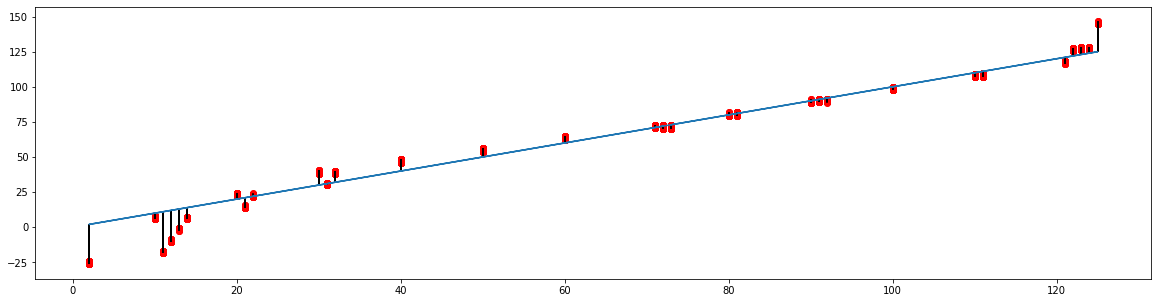

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
x = y_test
y = predictions
dy = y_test
ax.plot(x,dy)
ax.scatter(x,y,color="red")
ax.vlines(x,x,y)
plt.show()

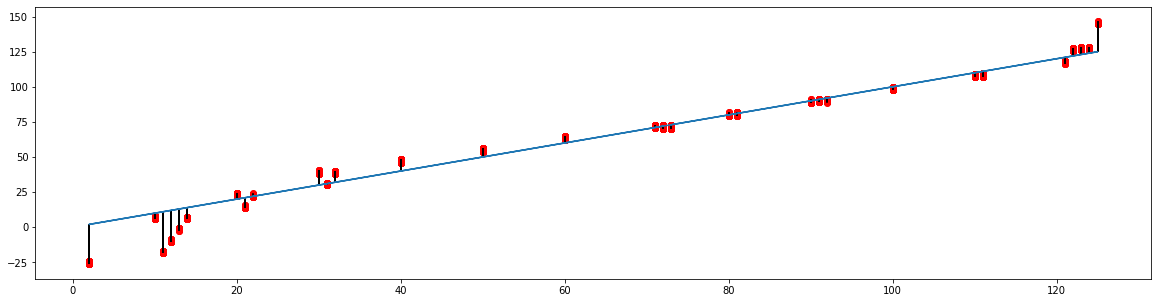

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
x = y_test
y = predictions
dy = y_test
ax.plot(x,dy)
ax.scatter(x,y,color="red")
ax.vlines(x,x,y)
plt.show()